In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.798
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.368
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.188
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.376
9799,9800,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-AC-10000487,Technology,Accessories,SanDisk Cruzer 4 GB USB Flash Drive,10.384


### General Exploratory Data Analysis

In [4]:
df.shape

(9800, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Row ID,9800.0,4900.500000,2829.160653,1.000,2450.750,4900.50,7350.250,9800.00
Postal Code,9789.0,55273.322403,32041.223413,1040.000,23223.000,58103.00,90008.000,99301.00
Sales,9800.0,230.769059,626.651875,0.444,17.248,54.49,210.605,22638.48


In [7]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [8]:
#counts duplicate rows
df.duplicated().sum()

0

In [9]:
# replace the 11 null value with mean value of postal code
df['Postal Code']=df['Postal Code'].replace(np.nan,55273.322403)

In [10]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [11]:
df["Order Date"] = pd.to_datetime(df['Order Date'],dayfirst = True)
df['Ship Date']= pd.to_datetime(df['Ship Date'],dayfirst=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   datetime64[ns]
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9800 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

### Total Sales

In [12]:
total_sales = df['Sales'].sum()
print(f"Total Sales: ${total_sales:,.2f}") 

Total Sales: $2,261,536.78


In [13]:
sales_category = df.groupby(['Category'],as_index = False)['Sales'].sum()
sales_category

,Category,Sales
0,Furniture,728658.5757
1,Office Supplies,705422.3340
2,Technology,827455.8730


### Total Sales by Category

Text(0, 0.5, '')

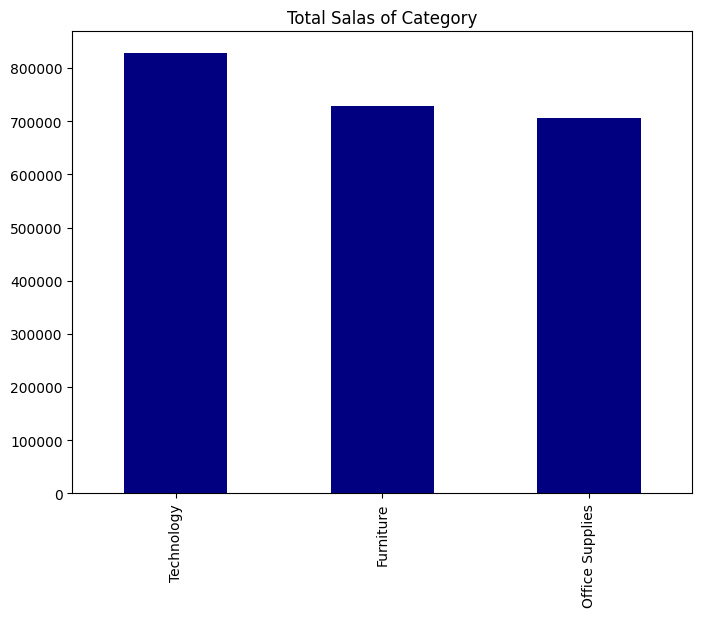

In [14]:
sales_categories = df.groupby("Category")["Sales"].sum().sort_values(ascending= False)
sales_categories.plot(
    kind='bar',
    color='navy',
    figsize=(8,6)
)
plt.title('Total Salas of Category')
plt.xlabel('')
plt.ylabel('')

### Total Sales by Region

In [15]:
sale_regions = df.groupby(['Region'],as_index=False)['Sales'].sum()
sale_regions

,Region,Sales
0,Central,492646.9132
1,East,669518.7260
2,South,389151.4590
3,West,710219.6845


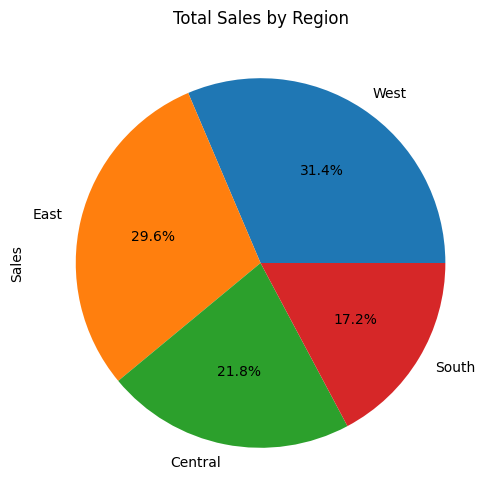

In [16]:
sales_region = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
sales_region.plot(
    kind='pie',
    autopct='%1.1f%%',
    figsize = (8,6)
)
plt.title('Total Sales by Region')
plt.show()


### Overall Sales by Month and Year 

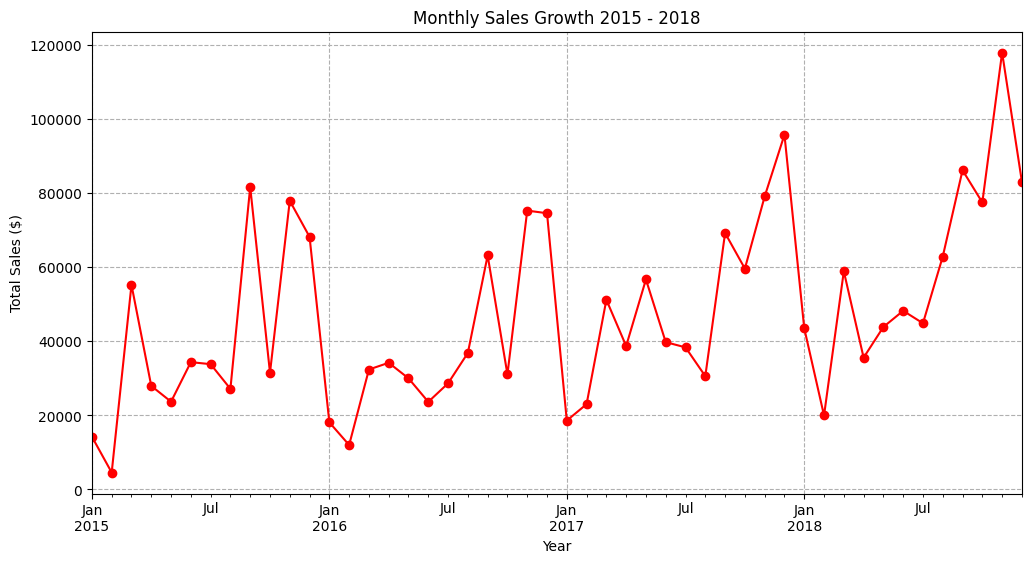

In [17]:
#set_index it will use order date as index and .resample it will group the data into month_start buckets
month_sales = df.set_index('Order Date')['Sales'].resample('MS').sum()
month_sales.plot(
    kind='line',
    color='Red',
    figsize=(12,6),
    marker='o'
    
)
plt.title('Monthly Sales Growth 2015 - 2018')
plt.ylabel('Total Sales ($)')
plt.xlabel('Year')
plt.grid(True,linestyle='--')

### Overall Sales by Year

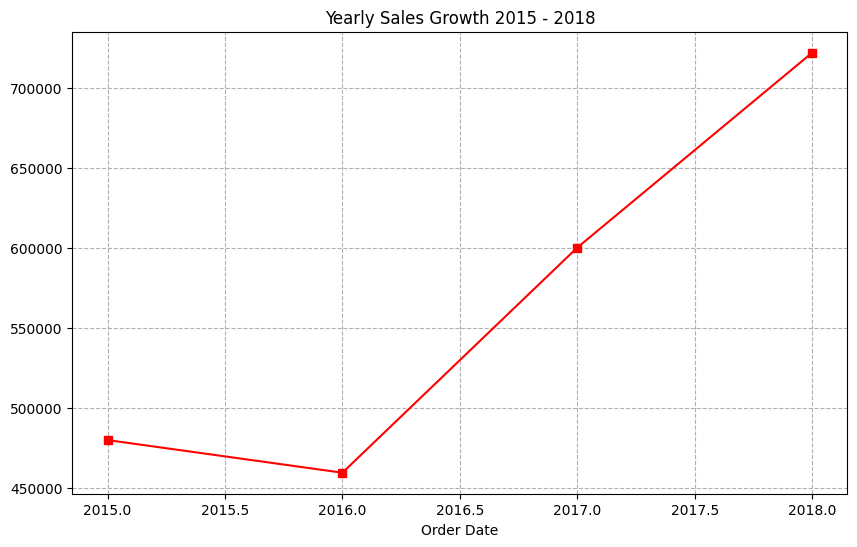

In [18]:
sale_year = df.groupby(df['Order Date'].dt.year)['Sales'].sum()
sale_year.plot(
    kind='line',
    color='Red',
    figsize=(10,6),
    marker='s'
)
plt.title('Yearly Sales Growth 2015 - 2018')
plt.grid(True,linestyle='--')

### Hiegest Sales by City

In [19]:
top_city = df.groupby(['City'],as_index=False)['Sales'].sum()
top_city

,City,Sales
0,Aberdeen,25.500
1,Abilene,1.392
2,Akron,2724.244
3,Albuquerque,2220.160
4,Alexandria,5519.570
...,...,...
524,Woonsocket,195.550
525,Yonkers,7657.666
526,York,817.978
527,Yucaipa,50.800


In [20]:
top_city=df['City'].value_counts().head(10)
top_city

City
New York City    891
Los Angeles      728
Philadelphia     532
San Francisco    500
Seattle          426
Houston          374
Chicago          308
Columbus         221
San Diego        170
Springfield      161
Name: count, dtype: int64

Text(0, 0.5, 'Total Numebr of Order ')

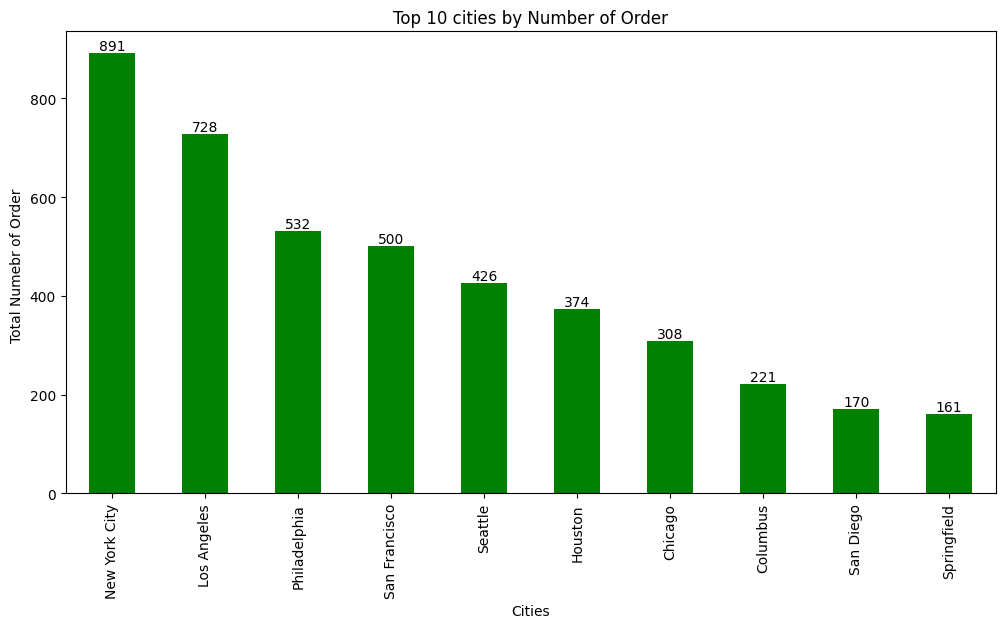

In [21]:
ax = top_city.head(10).plot(
    kind='bar',
    figsize=(12,6),
    color='Green',
)
ax.bar_label(ax.containers[0]) # bar_label shows the number top of the bar
plt.title('Top 10 cities by Number of Order')
plt.xlabel('Cities')
plt.ylabel('Total Numebr of Order ')

### Top Product by Sales

In [32]:
top_products=df.groupby(['Product Name'],as_index=False)['Sales'].sum()
top_products

,Product Name,Sales
0,"""While you Were Out"" Message Book, One Form pe...",25.228
1,"#10 Gummed Flap White Envelopes, 100/Box",41.300
2,#10 Self-Seal White Envelopes,108.682
3,"#10 White Business Envelopes,4 1/8 x 9 1/2",379.214
4,"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",286.672
...,...,...
1844,iKross Bluetooth Portable Keyboard + Cell Phon...,477.660
1845,iOttie HLCRIO102 Car Mount,215.892
1846,iOttie XL Car Mount,223.888
1847,invisibleSHIELD by ZAGG Smudge-Free Screen Pro...,442.554


In [33]:
top_products=df['Product Name'].value_counts().head(10)
top_products

Product Name
Staple envelope                                              47
Staples                                                      46
Easy-staple paper                                            44
Avery Non-Stick Binders                                      20
Staples in misc. colors                                      18
Staple remover                                               18
Storex Dura Pro Binders                                      17
KI Adjustable-Height Table                                   17
Staple-based wall hangings                                   16
Logitech 910-002974 M325 Wireless Mouse for Web Scrolling    15
Name: count, dtype: int64

Text(0.5, 1.0, 'Top Product by Sales')

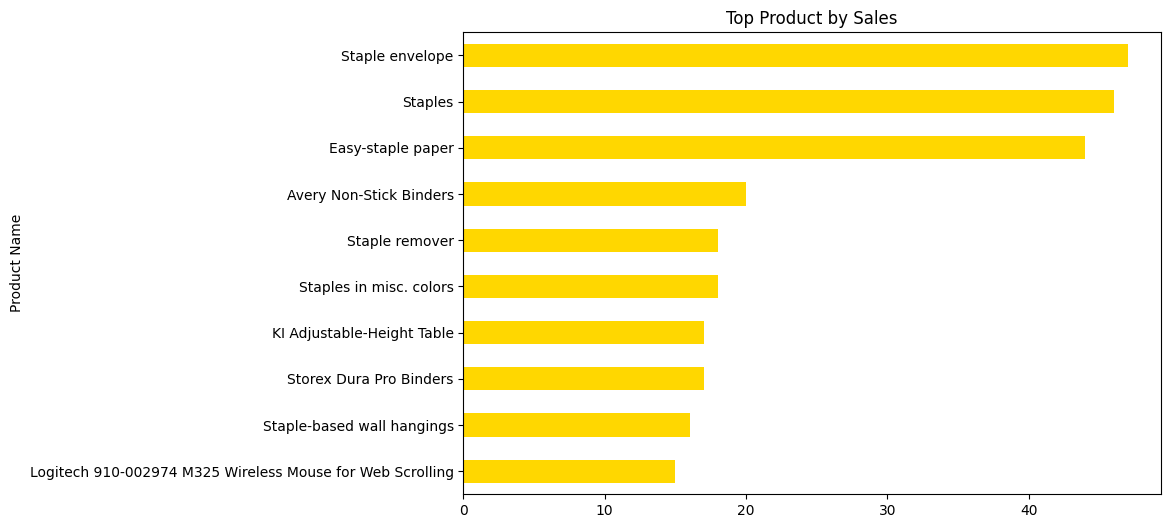

In [93]:
top_products.sort_values(ascending=True).head(10).plot(
    kind='barh',
    figsize=(9,6),
    color='Gold'
)
plt.title('Top Product by Sales')

### customer segment contributes most

In [125]:
top_segment=df.groupby(['Segment'],as_index=False)['Sales'].sum()
top_segment

,Segment,Sales
0,Consumer,1.148061e+06
1,Corporate,6.884941e+05
2,Home Office,4.249822e+05


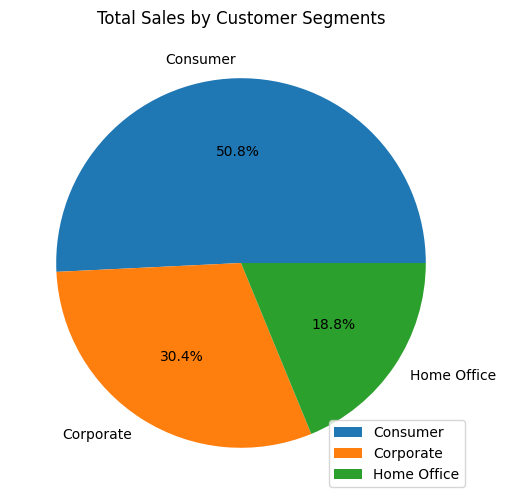

In [126]:
top_segment = top_segment.set_index('Segment')
ts=top_segment.plot(
    kind='pie',
    y='Sales',
    autopct='%1.1f%%',
    figsize = (8,6),
    legend=True
)

plt.title('Total Sales by Customer Segments')
plt.xlabel('')
plt.ylabel('')
plt.show()

### sale Month Over Month & Year

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   datetime64[ns]
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9800 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

In [40]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

In [41]:
#pivot table creates a table showing the total sales for each month & year combination
pivot_table = df.pivot_table(index='Month',columns='Year', values = 'Sales', aggfunc='sum')

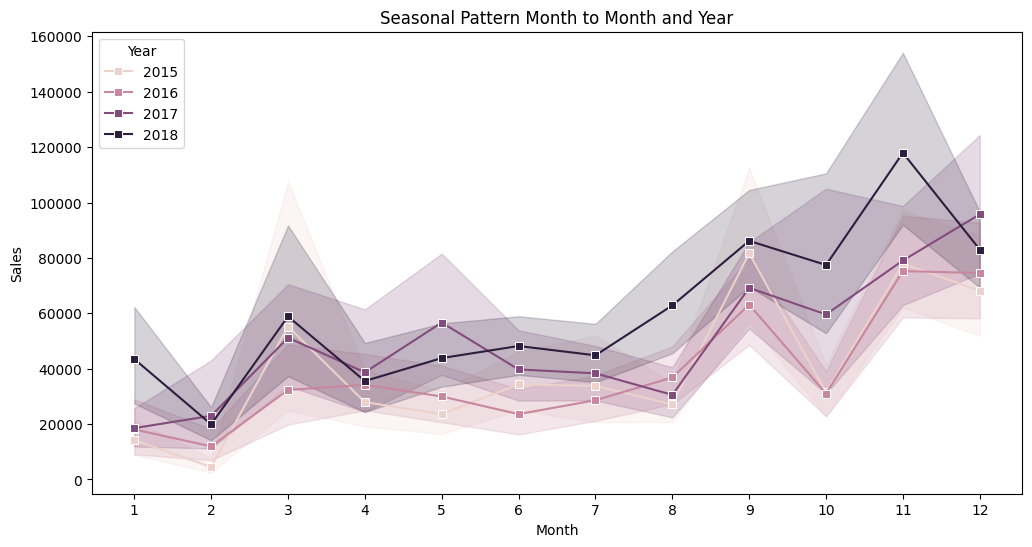

In [59]:
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df, 
    x='Month', 
    y='Sales', 
    hue='Year', 
    estimator='sum', 
    marker='s'
)
plt.title('Seasonal Pattern Month to Month and Year')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(range(1,13))
plt.show()

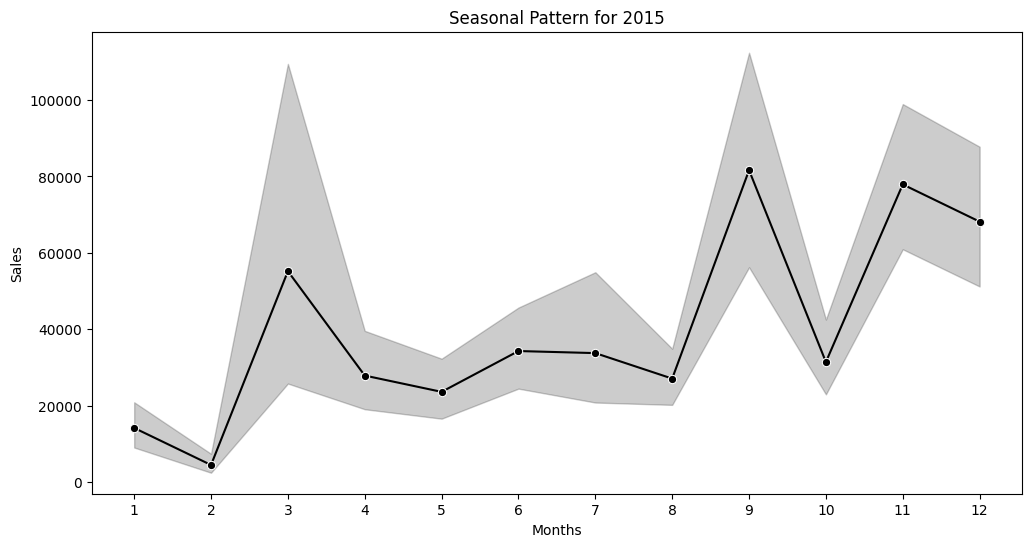

In [43]:
df_2015 = df[df['Year']==2015]

plt.figure(figsize=(12,6))
sns.lineplot(
    data= df_2015,
    x='Month',
    y='Sales',
    estimator='sum',
    marker='o',
    color='Black'
)
plt.title('Seasonal Pattern for 2015')
plt.xlabel('Months')
plt.ylabel('Sales')
plt.xticks(range(1,13))
plt.show()

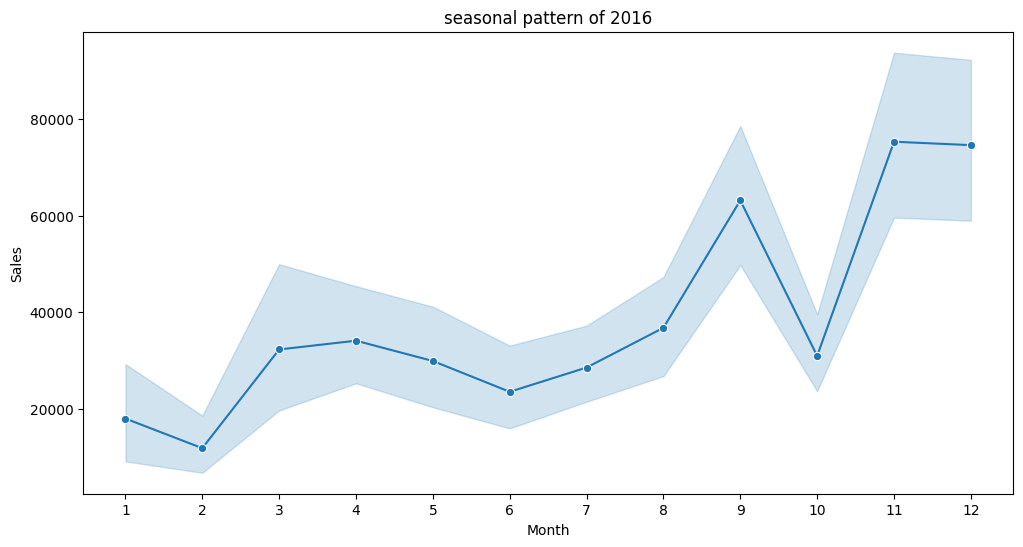

In [53]:
df2016 = df[df['Year']==2016]

plt.figure(figsize=(12,6))

sns.lineplot(
    data=df2016,
    x='Month',
    y='Sales',
    estimator='sum',
    marker='o'
)
plt.title('seasonal pattern of 2016')
plt.xticks(range(1,13))
plt.show()


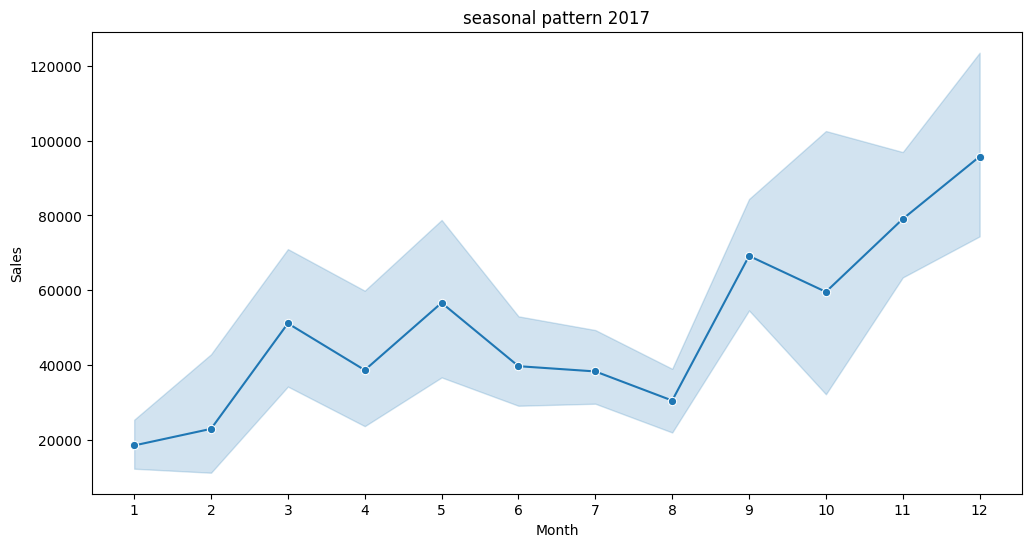

In [58]:
df2017 = df[df['Year']==2017]

plt.figure(figsize=(12,6))

sns.lineplot(
    data=df2017,
    x='Month',
    y='Sales',
    estimator = 'sum',
    marker='o'
)
plt.title('seasonal pattern 2017')
plt.xticks(range(1,13))
plt.show()


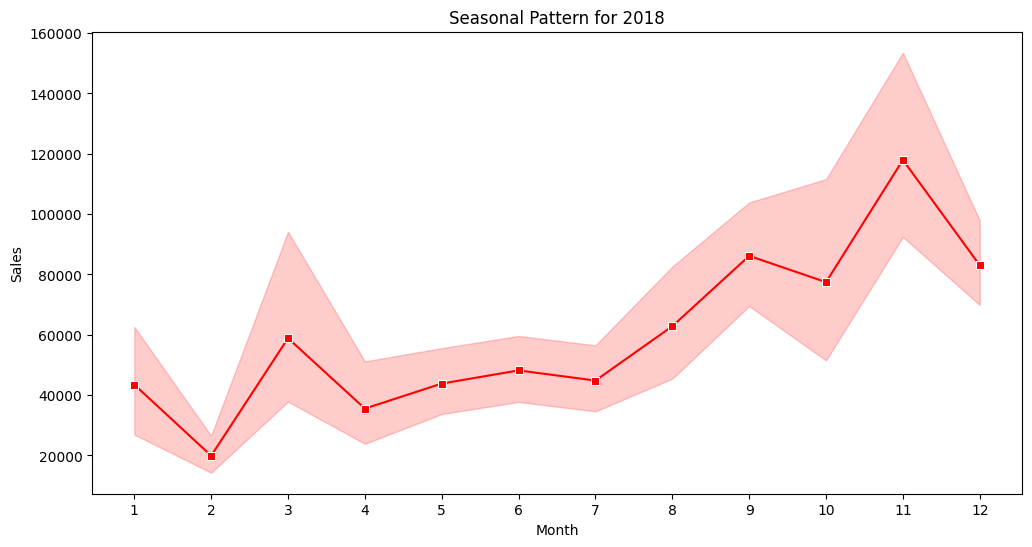

In [50]:
# Filter for 2018 only
df_2018 = df[df['Year'] == 2018]

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_2018, 
    x='Month', 
    y='Sales', 
    estimator='sum', 
    marker='s',
    color='red'
)
plt.title('Seasonal Pattern for 2018')
plt.xticks(range(1, 13))
plt.show()

### Which ship mode is most used?

In [136]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Year,Month
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2017,11
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,2017,11


In [154]:
top_shiped = df.groupby(['Ship Mode'],as_index=False)['Sales'].mean()
top_shiped

,Ship Mode,Sales
0,First Class,230.228020
1,Same Day,232.749143
2,Second Class,236.547939
3,Standard Class,228.849856


In [155]:
top_shiped=df['Ship Mode'].value_counts().head()
top_shiped

Ship Mode
Standard Class    5859
Second Class      1902
First Class       1501
Same Day           538
Name: count, dtype: int64

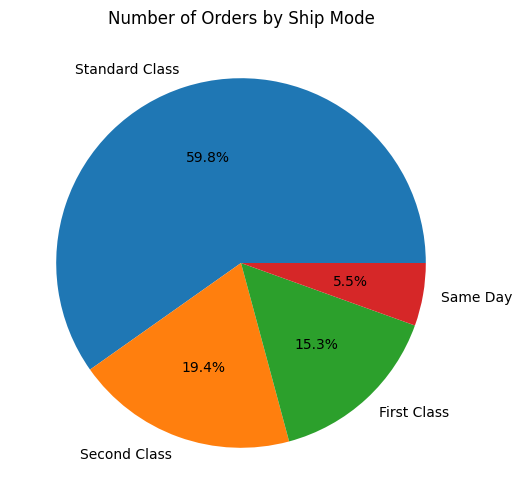

In [156]:

top_shiped.plot(
    kind='pie',
    autopct='%1.1f%%',
    figsize=(8,6)
)
plt.title('Number of Orders by Ship Mode')
plt.xlabel('')
plt.ylabel('')

plt.show()


### Where are sales underperforming geographically?

In [146]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Year,Month
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2017,11
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,2017,11


In [153]:
low_sales=df['State'].value_counts().tail(10)
low_sales

State
Kansas                  24
Idaho                   21
Montana                 15
South Dakota            12
Vermont                 11
District of Columbia    10
Maine                    8
North Dakota             7
West Virginia            4
Wyoming                  1
Name: count, dtype: int64

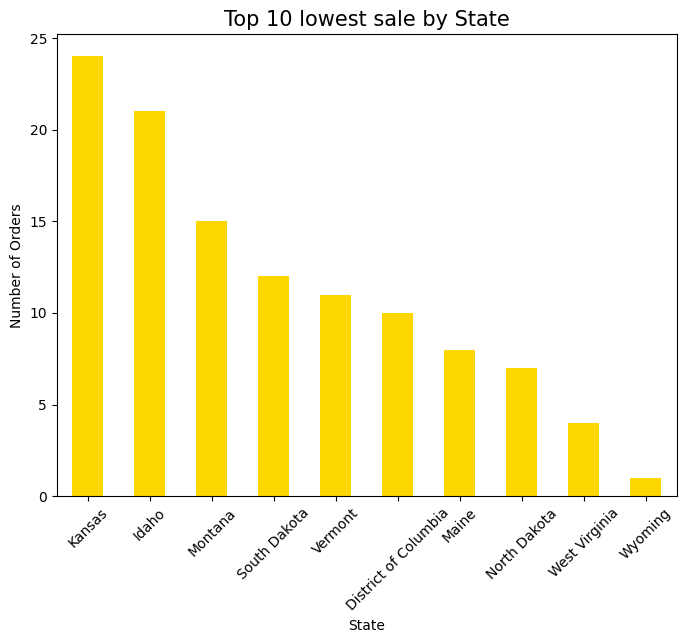

In [168]:
low_sales.tail(10).plot(
    kind='bar',
    figsize=(8,6),
    color='Gold'
)
plt.title('Top 10 lowest sale by State',fontsize=15)
plt.xlabel('State',fontsize=10)
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()